In [ ]:
import pandas as pd
import numpy as np
from numpy import random
import math

In [1415]:
data=pd.read_csv('signal.csv')
vals = data.values
#print(vals)

prev_vals = 500
samples = 200

nums = [int(x) for x in random.rand(samples)*(4000 - prev_vals)]
#print(nums)

X = np.array([])
Y = np.array([])
for i in nums:
    X = np.append(X,[vals[i:i+prev_vals-1]])
    Y = np.append(Y,[vals[i+prev_vals-1]])

X = X.reshape(samples,prev_vals-1)
print(X.shape)
print(Y.shape)

(200, 499)
(200,)


In [1416]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape)
print(y_train.shape)

(100, 499)
(100,)


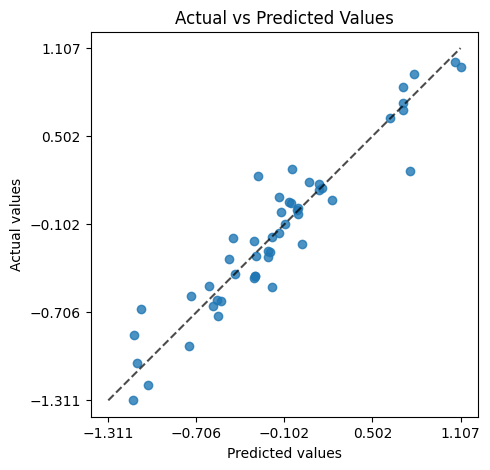

In [1417]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(5,5))
PredictionErrorDisplay.from_estimator(model, X_test, y_test, ax=ax, kind="actual_vs_predicted")
#residual_vs_predicted
#actual_vs_predicted

ax.set_title("Actual vs Predicted Values")
plt.show()

In [1418]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

mse_val = evaluate_model(model, X_val, y_val)
mse_test = evaluate_model(model, X_test, y_test)

print(f'Validation MSE: {mse_val:.4f}')
print(f'Test MSE: {mse_test:.4f}')

Validation MSE: 0.0391
Test MSE: 0.0317


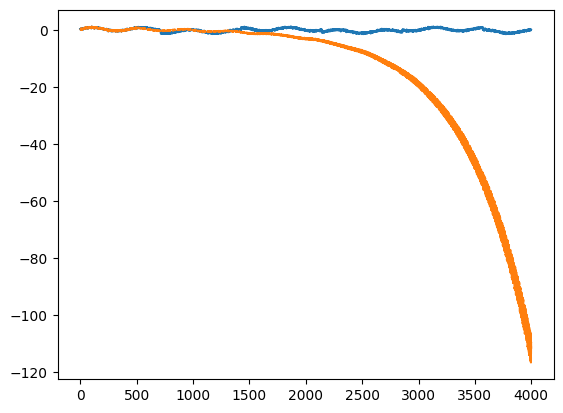

In [1419]:
start = 500
new_signal = np.array(vals[0:start])
#print(vals.shape)
for i in range(start,4000):
    pass
    next_val = model.predict(new_signal[i-prev_vals+1:i].reshape(1,-1))
    new_signal = np.append(new_signal,next_val)

plt.plot(vals, label='Original Signal')
plt.plot(new_signal, label='Predicted Signal', linestyle='--')
